In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [2]:
start_date = '2022-1-1'
history_map = {}
for symbol in ['SMH','USD','SOXL','QQQ','TQQQ','NVDA','FNGU','FNGS','MAGS','MAGX','MAG7.L','NVD3.L','QQQ5.L']:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 137w
USD history: 137w
SOXL history: 137w
QQQ history: 137w
TQQQ history: 137w
NVDA history: 137w
FNGU history: 137w
FNGS history: 137w
MAGS history: 71w
MAGX history: 25w
MAG7.L history: 19w
NVD3.L history: 137w
QQQ5.L history: 137w


In [3]:
rows = []
for symbol in history_map:
    history = history_map[symbol]
    C2L = (history['Low'].shift(-1) / history['Close'] - 1) * 100
    rows.append({
        'symbol': symbol,
        'C2L 20%': C2L.quantile(0.2),
        'C2L 50%': C2L.quantile(0.5),
        'C2L 80%': C2L.quantile(0.8),
    })
C2L = pd.DataFrame(rows)
print(C2L)

    symbol    C2L 20%    C2L 50%   C2L 80%
0      SMH  -5.259803  -2.694982 -0.762752
1      USD -11.484749  -5.954119 -1.469471
2     SOXL -15.746957  -8.978556 -2.942057
3      QQQ  -3.689080  -1.886945 -0.486236
4     TQQQ -11.099598  -5.686336 -1.521309
5     NVDA  -8.269816  -3.532261 -0.963830
6     FNGU -14.668039  -7.662899 -2.319534
7     FNGS  -4.766949  -2.458033 -0.614253
8     MAGS  -2.958576  -1.517955 -0.256692
9     MAGX  -7.585037  -2.686567 -0.470458
10  MAG7.L -23.366515 -10.338636 -3.656062
11  NVD3.L -24.335448 -12.282353 -4.736563
12  QQQ5.L -18.198312  -7.954470  0.277164


In [4]:
# Plot median stock change over number of weeks
max_weeks = 26
df = pd.DataFrame()


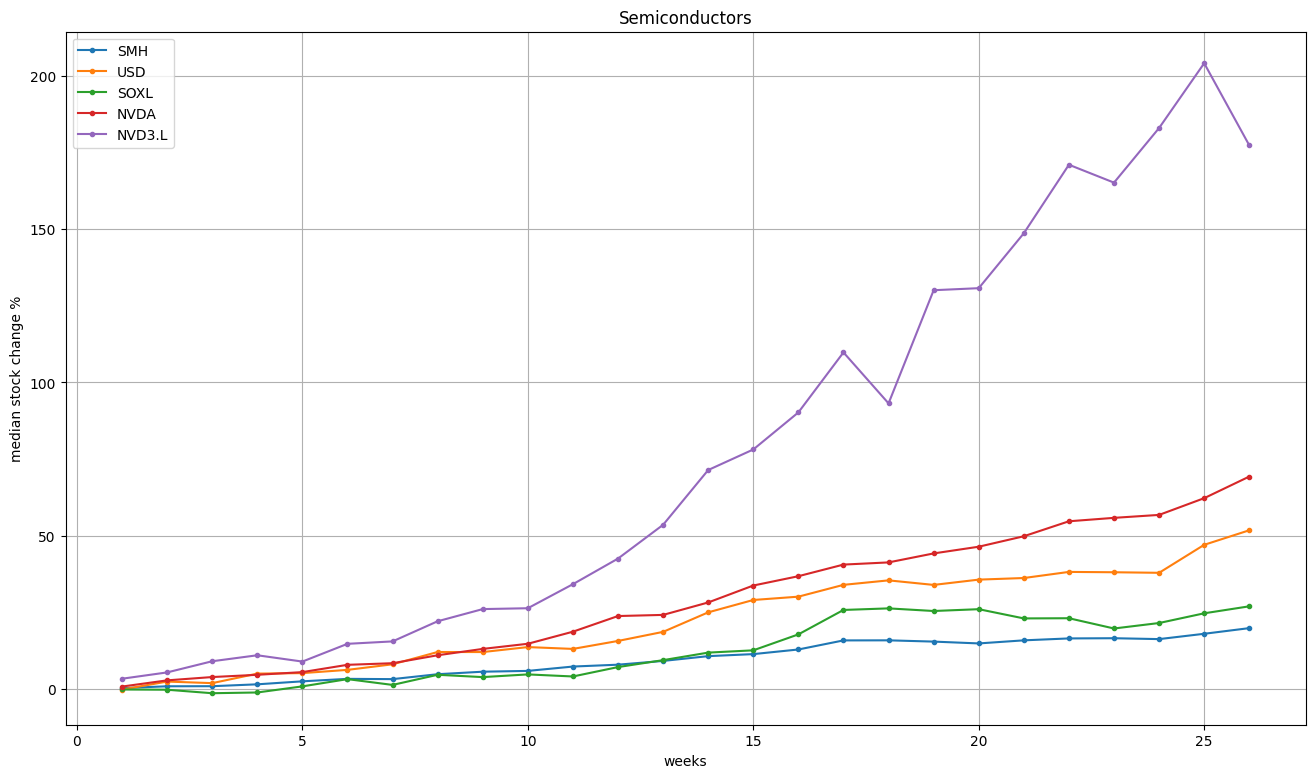

In [5]:
symbols = ['SMH','USD','SOXL','NVDA','NVD3.L']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    # plt.plot(stock_change_median, label=symbol, marker='.')
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Semiconductors')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [6]:
print(f'USD:SMH {(df.USD / df.SMH).median():.1f}')
print(f'NVD3.L:NVDA {(df["NVD3.L"] / df.NVDA).median():.1f}')

USD:SMH 2.3
NVD3.L:NVDA 2.4


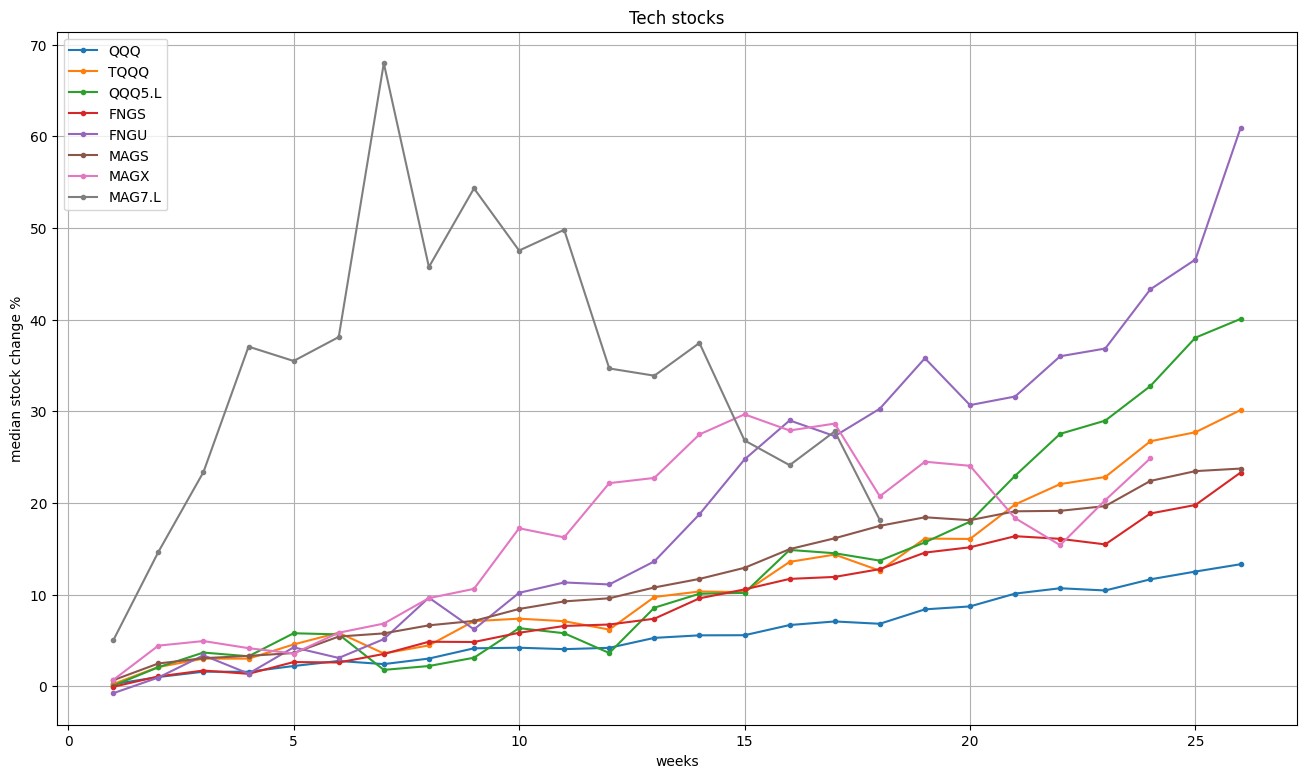

In [7]:
symbols = ['QQQ','TQQQ','QQQ5.L','FNGS','FNGU','MAGS','MAGX','MAG7.L']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Tech stocks')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [8]:
print(f'TQQQ:QQQ {(df.TQQQ / df.QQQ).median():.1f}')
print(f'QQQ5.L:QQQ {(df["QQQ5.L"] / df.QQQ).median():.1f}')
print(f'FNGU:FNGS {(df.FNGU / df.FNGS).median():.1f}')
print(f'MAGX:MAGS {(df.MAGX / df.MAGS).median():.1f}')
print(f'MAG7.L:MAGS {(df["MAG7.L"] / df.MAGS).median():.1f}')

TQQQ:QQQ 1.9
QQQ5.L:QQQ 2.1
FNGU:FNGS 2.0
MAGX:MAGS 1.4
MAG7.L:MAGS 5.8
